In [66]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [67]:
df = pd.read_csv('data/data.csv', encoding='latin-1')

In [68]:
print(len(df))

1653


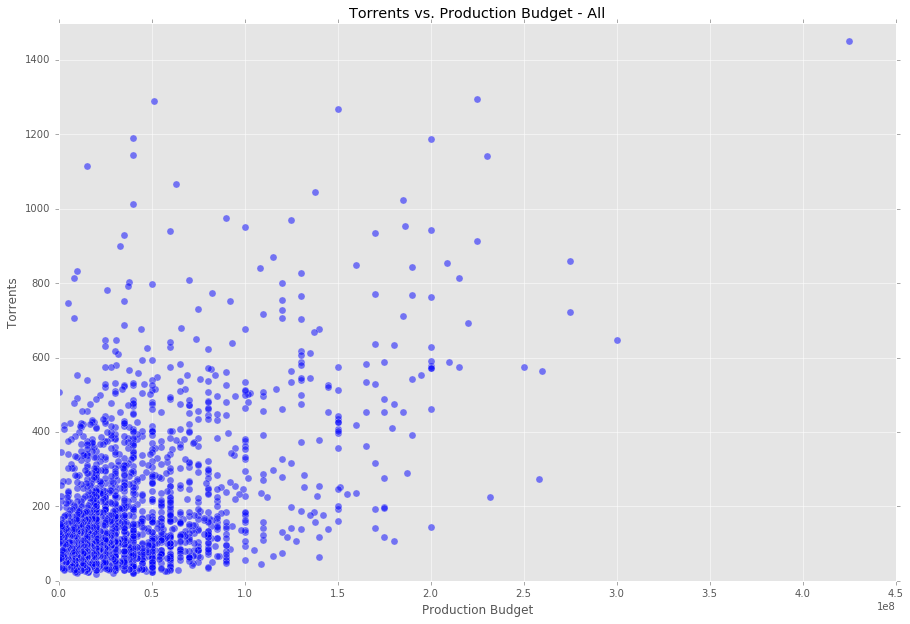

In [69]:
plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - All')
plt.scatter(df['Prod_Budget'], df['Total_Torrents'], alpha=0.5, s=50)

In [70]:
# unique list of grouped rating as a string
unq_rating = df['Rated'].unique()
unq_rating = unq_rating.tolist()
unq_rating = [rating.strip() for rating in unq_rating if type(rating) == str]
print(unq_rating)

['PG-13', 'PG', 'G', 'R', 'TV-14', 'NC-17', 'APPROVED', 'M', 'GP', 'X', 'NOT RATED', 'PASSED', 'UNRATED']


In [71]:
df['Rated'].value_counts()

R            690
PG-13        660
PG           255
G             21
APPROVED       6
UNRATED        3
NOT RATED      3
M              3
X              2
TV-14          1
NC-17          1
GP             1
PASSED         1
Name: Rated, dtype: int64

In [75]:
# dictionary - count of genre occurences
count = defaultdict(lambda:0)

for rating in unq_rating:
    count[rating] = df.Rated.value_counts()[rating]
    #count[rating] = df.Rated.str.contains(rating).sum()

import operator
srt = sorted(count.items(), key=operator.itemgetter(1))
srt = srt[::-1]
print(srt)

[('R', 690), ('PG-13', 660), ('PG', 255), ('G', 21), ('APPROVED', 6), ('UNRATED', 3), ('NOT RATED', 3), ('M', 3), ('X', 2), ('PASSED', 1), ('TV-14', 1), ('GP', 1), ('NC-17', 1)]


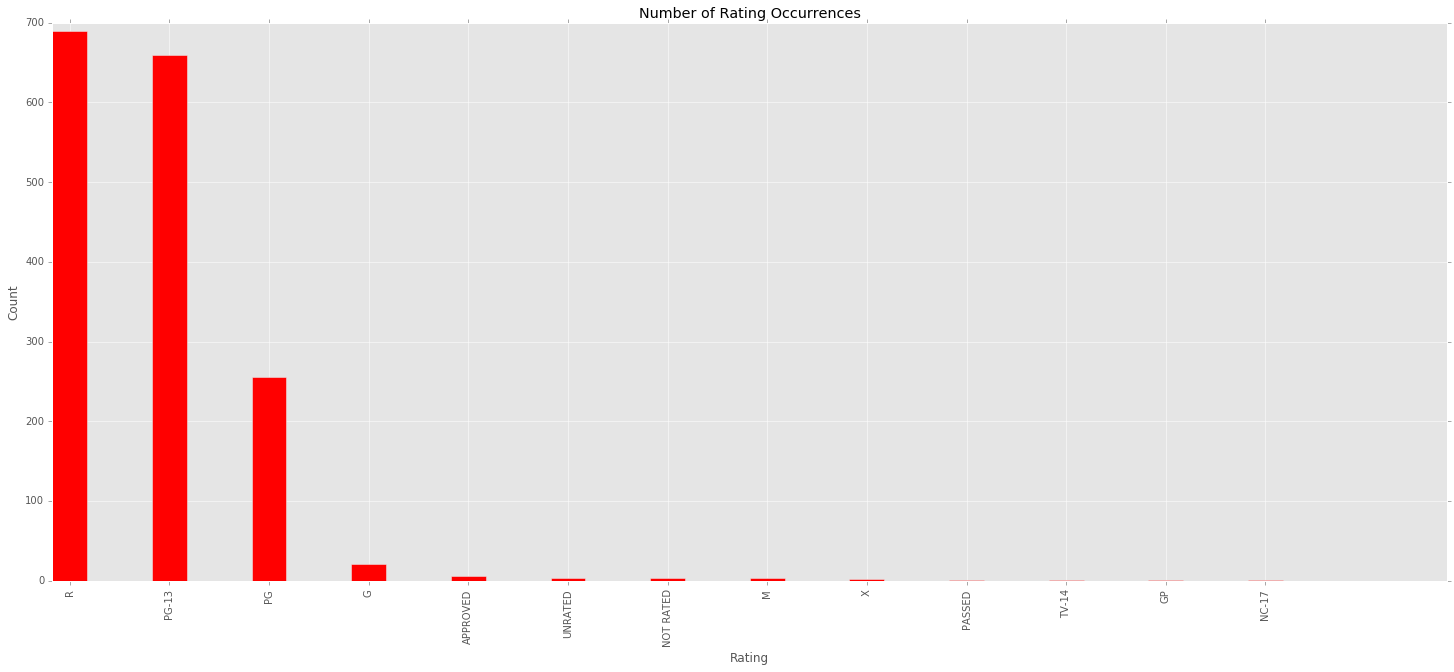

[('R', 690), ('PG-13', 660), ('PG', 255), ('G', 21), ('APPROVED', 6), ('UNRATED', 3), ('NOT RATED', 3), ('M', 3), ('X', 2), ('PASSED', 1), ('TV-14', 1), ('GP', 1), ('NC-17', 1)]


In [76]:
plt.figure(figsize=(25,10))

ind = np.arange(len(count)) # the x locations for the groups
width = 0.35 # the width of the bars

bar_rating = [rating for rating, count in srt]
bar_count = [count for rating, count in srt]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Number of Rating Occurrences')
plt.xticks(ind + width/2., (bar_rating), rotation='vertical')
plt.yticks(np.arange(0, 701, 100))

plt.show()
print(srt)

In [77]:
ttl = 0

for k,v in srt:
    ttl += v
print(ttl)

1647


In [78]:
ratings = ['PG-13', 'PG', 'G', 'R']
df = df.loc[df['Rated'].isin(ratings)]
print(len(df))

1626


690


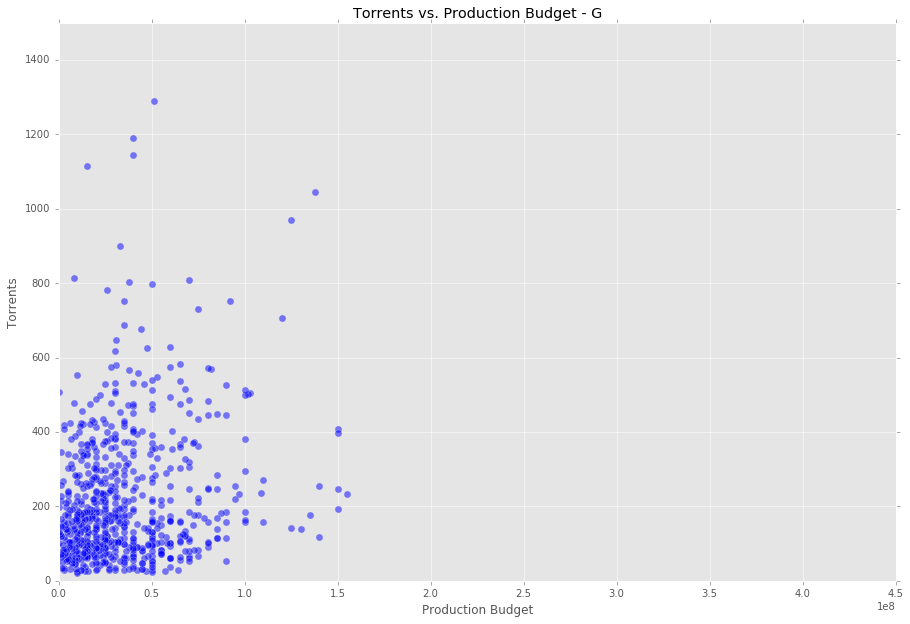

In [60]:
term = 'G'
df_a = df.loc[df['Rated']== 'R']
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

620


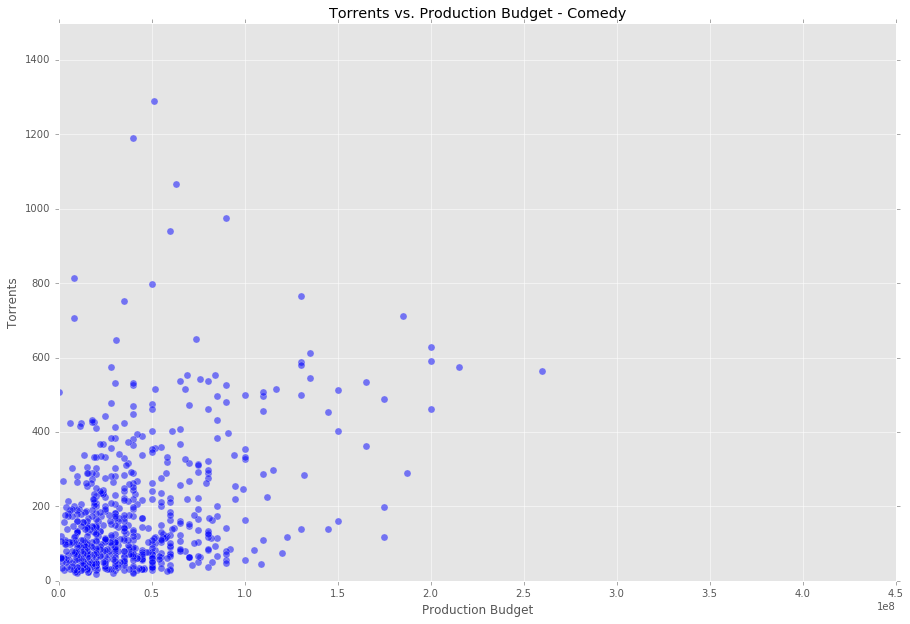

In [12]:
term = 'R'
df_a = df.loc[df['Rated'].isin([term])]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

547


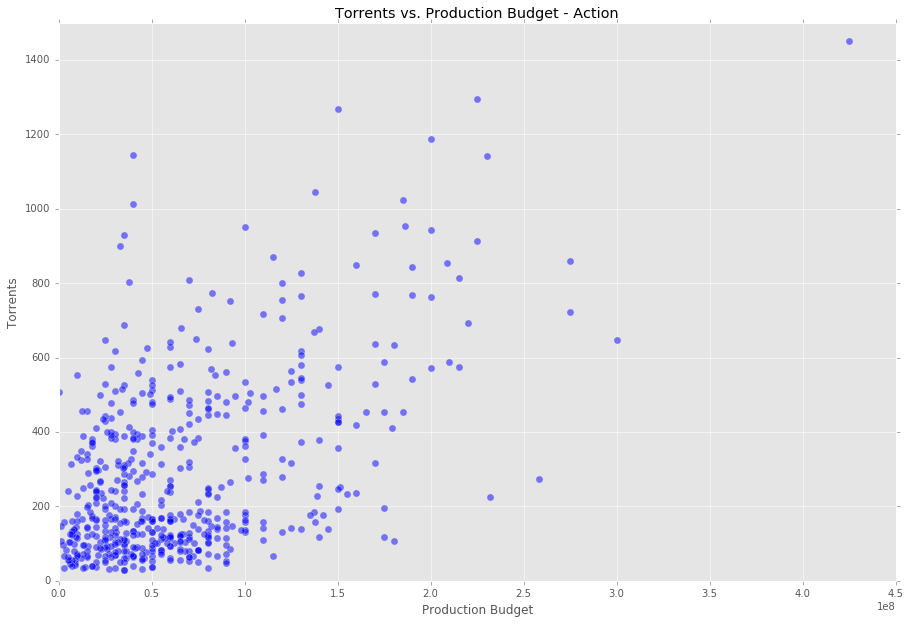

In [13]:
term = 'Action'
df_a = df.loc[df['Genre'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

In [14]:
df['Genre'].value_counts()

Comedy                          76
Comedy, Romance                 71
Action, Crime, Drama            60
Comedy, Drama, Romance          57
Crime, Drama, Thriller          44
Action, Comedy, Crime           43
Action, Adventure, Sci-Fi       41
Action, Crime, Thriller         40
Drama, Romance                  34
Animation, Adventure, Comedy    32
Action, Adventure, Comedy       30
Comedy, Drama                   28
Action, Adventure, Thriller     27
Horror                          27
Action, Adventure, Drama        24
Crime, Drama, Mystery           23
Action, Adventure, Fantasy      23
Horror, Mystery                 22
Horror, Mystery, Thriller       22
Drama                           19
Comedy, Crime                   17
Action, Drama, Thriller         17
Adventure, Comedy, Family       16
Drama, Thriller                 16
Comedy, Family                  15
Comedy, Family, Fantasy         15
Adventure, Family, Fantasy      14
Crime, Thriller                 14
Comedy, Drama, Famil

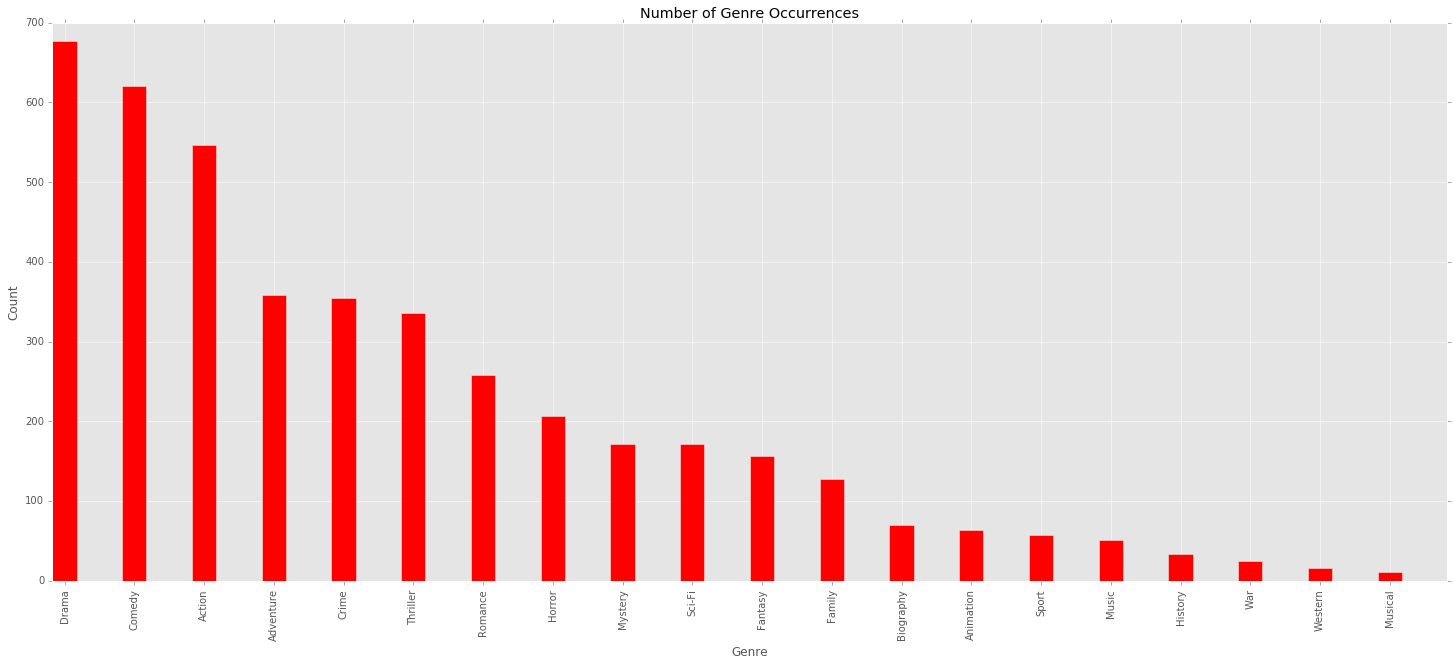

[('Drama', 677), ('Comedy', 620), ('Action', 547), ('Adventure', 359), ('Crime', 355), ('Thriller', 336), ('Romance', 258), ('Horror', 207), ('Mystery', 171), ('Sci-Fi', 171), ('Fantasy', 157), ('Family', 127), ('Biography', 70), ('Animation', 64), ('Sport', 57), ('Music', 51), ('History', 34), ('War', 25), ('Western', 16), ('Musical', 11)]


In [15]:
plt.figure(figsize=(25,10))

ind = np.arange(len(count)) # the x locations for the groups
width = 0.35 # the width of the bars

bar_genre = [genre for genre, count in srt]
bar_count = [count for genre, count in srt]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Genre')
plt.title('Number of Genre Occurrences')
plt.xticks(ind + width/2., (bar_genre), rotation='vertical')
plt.yticks(np.arange(0, 701, 100))

plt.show()
print(srt)

In [16]:
df_sub = df[['Prod_Budget', 'Genre', 'Total_Torrents']]
df_sub.describe()

,Prod_Budget,Total_Torrents
count,1.653000e+03,1653.000000
mean,4.766387e+07,223.719903
std,4.434656e+07,196.768665
min,6.800000e+04,17.000000
25%,1.800000e+07,89.000000
50%,3.500000e+07,158.000000
75%,6.000000e+07,299.000000
max,4.250000e+08,1450.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e272cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d52cef0>]], dtype=object)

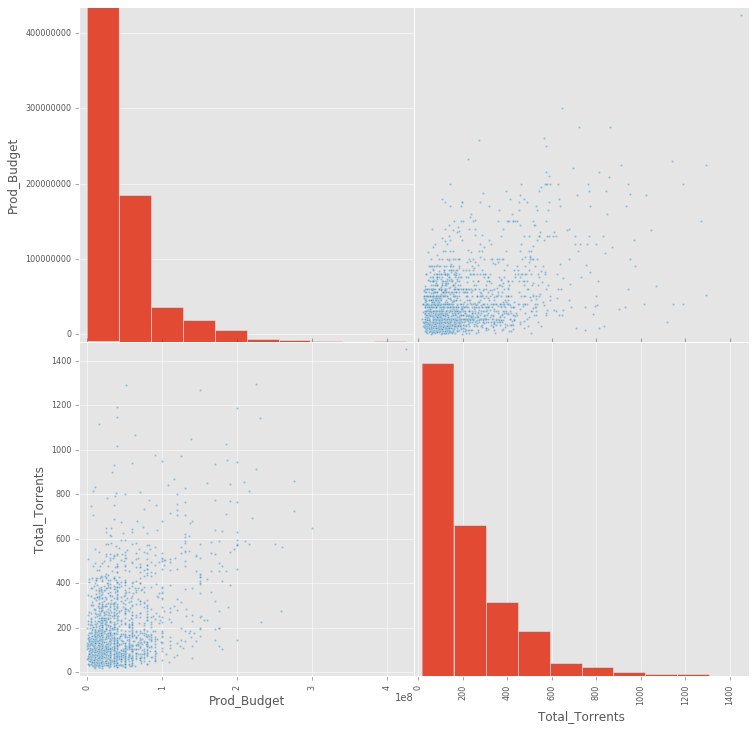

In [17]:
# Lets take a look at our entire model
plt.rcParams['figure.figsize'] = (12, 12)
pd.tools.plotting.scatter_matrix(df_sub)

In [18]:
from patsy import dmatrices

y, x = dmatrices('Total_Torrents ~ Prod_Budget + Genre', data=df_sub, return_type='dataframe')

In [19]:
y.head()

,Total_Torrents
0,1450.0
1,647.0
2,861.0
3,723.0
4,563.0


In [20]:
x.head()

,Intercept,"Genre[T.Action, Adventure]","Genre[T.Action, Adventure, Biography]","Genre[T.Action, Adventure, Comedy]","Genre[T.Action, Adventure, Crime]","Genre[T.Action, Adventure, Drama]","Genre[T.Action, Adventure, Family]","Genre[T.Action, Adventure, Fantasy]","Genre[T.Action, Adventure, History]","Genre[T.Action, Adventure, Horror]",...,"Genre[T.Horror, Thriller]","Genre[T.Musical, Romance]","Genre[T.Mystery, Sci-Fi, Thriller]","Genre[T.Mystery, Thriller]","Genre[T.Romance, Sci-Fi, Thriller]","Genre[T.Sci-Fi, Adventure, Action]","Genre[T.Sci-Fi, Thriller]",Genre[T.Thriller],Genre[T.Western],Prod_Budget
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,425000000.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000000.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275000000.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275000000.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260000000.0


In [21]:
import statsmodels.api as sm

model = sm.OLS(y, x)
results = model.fit()

#results.summary()

In [22]:
import statsmodels.formula.api as smf

results = smf.ols(formula='Total_Torrents ~ Prod_Budget + Genre', data=df_sub,).fit()

#results.summary()

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
model.score(x, y)

0.38250433528608807

In [25]:
#model.coef_

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d579e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d45b080>]], dtype=object)

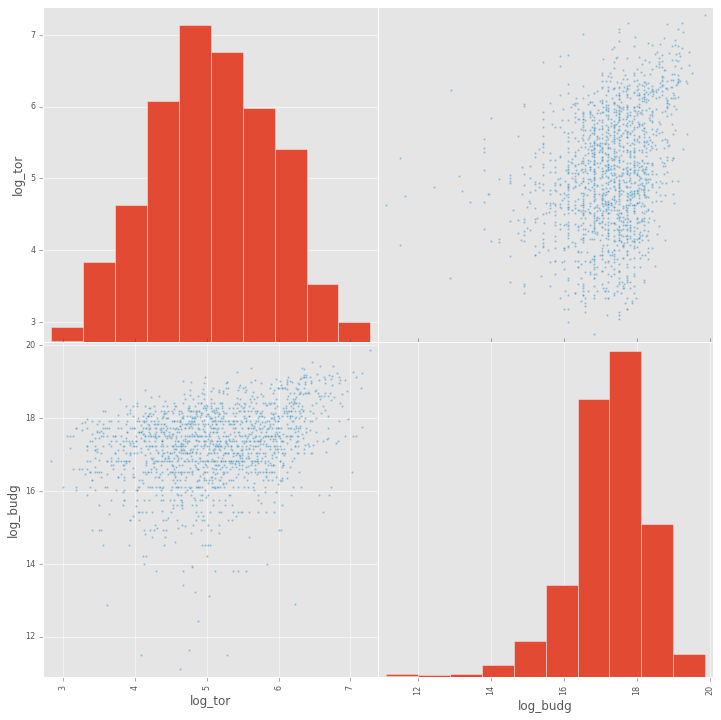

In [26]:
#data.yr=data.yr.replace({0:.25})

df_sub['log_tor']=np.log(df_sub.Total_Torrents)
df_sub['log_budg']=np.log(df_sub.Prod_Budget)

trans=df_sub[['log_tor','log_budg']]
pd.tools.plotting.scatter_matrix(trans)

In [27]:
y, x = dmatrices('log_tor ~ log_budg + Genre', data=df_sub, return_type='dataframe')
x.head()

,Intercept,"Genre[T.Action, Adventure]","Genre[T.Action, Adventure, Biography]","Genre[T.Action, Adventure, Comedy]","Genre[T.Action, Adventure, Crime]","Genre[T.Action, Adventure, Drama]","Genre[T.Action, Adventure, Family]","Genre[T.Action, Adventure, Fantasy]","Genre[T.Action, Adventure, History]","Genre[T.Action, Adventure, Horror]",...,"Genre[T.Horror, Thriller]","Genre[T.Musical, Romance]","Genre[T.Mystery, Sci-Fi, Thriller]","Genre[T.Mystery, Thriller]","Genre[T.Romance, Sci-Fi, Thriller]","Genre[T.Sci-Fi, Adventure, Action]","Genre[T.Sci-Fi, Thriller]",Genre[T.Thriller],Genre[T.Western],log_budg
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.867600
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.519293
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.432282
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.432282
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.376192


In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

model.score(x,y)

0.31580399128893399

In [29]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.333,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

In [30]:
#sum_squares_regr= np.sum((model.predict(x_train) -np.mean(y_train))**2)
# estimated value of y - y_mean
#total_sum_squares=np.sum((y_train-np.mean(y_train))**2)
#r_squared = sum_squares_regr / total_sum_squares

#print(sum_squares_regr)
#print(total_sum_squares)
#print(r_squared)

In [31]:
metrics.mean_squared_error(y_train,model.predict(x_train))

0.44087928761584544

In [32]:
model.score(x_train, y_train)

0.359490851905373

In [33]:
metrics.mean_squared_error(y_test,model.predict(x_test))

0.70124406118434712

In [34]:
# reset x, y otherwise errors occur
y, x = dmatrices('log_tor ~ log_budg + Genre', data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=100, shuffle=True)

for train_index, test_index in kf:
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

clf2.score(x,y)

0.31427500323014645